# Disentangling the relationships between discounts, sales, and profits for a global retailer #

## In this notebook: ##

__-Cleaning the data__<br>

__-Aggregated sales, profit, and units sold by the 7 markets the retailer services to find the most profitable region__<br>
__-Aggregated sales, profit, and units sold by the product category to find the most profitable product category__<br>

__-Time series analysis of sales, profit, and number of discounts per month from 2011-2014. The year 2014 had the highest sales and the highest number of discounts. However, profit remained relatively stagnant despite the increased sales__<br>

__-Plotted a barcharts of the distribution of discounts by percentage. - ranging from 7-85%.__<br>

__-Correlation of numerical features with profit__<br>

__-Simple linear regression using Seaborn's lmplot to predict profit as a function of sales__<br>
__-Simple linear regression using Seaborn's lmplot to predict profit as a function of sales by discount percentage__<br>

__-Grouped discount percentages from low (7-20%), medium (25-50%), and high (55-85%) and plotted them as sales vs profit to visualize how many orders of these discounted orders are profitable__<br>
__-Found that the most consistently profitable orders are typically between approximately 7-20%__<br>
__-Seaborn's kdeplot to plot the probability density function of each group of discount ranges for both profit and sales__<br>

__-Simple linear regression of shipping cost vs sales and shipping cost vs profit__<br>

__log10 transformation of sales distribution to make them approximately normal__<br>
__-t-test of discounts vs sales and discounts vs profit__<br>

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statistics as sts
import math
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('ggplot')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [78]:
df = pd.read_csv("Global_Superstore2.csv",
                encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [79]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

# Cleaning the data #

looking for missing data - how will we handle NaNs? 

locating duplicates



## Missing data ##

In [80]:
#how much data is missing per column?
for col in df.columns:
    percent_missing=100*np.mean(df[col].isnull())
    print('{}-{}%'.format(col, percent_missing))

Row ID-0.0%
Order ID-0.0%
Order Date-0.0%
Ship Date-0.0%
Ship Mode-0.0%
Customer ID-0.0%
Customer Name-0.0%
Segment-0.0%
City-0.0%
State-0.0%
Country-0.0%
Postal Code-80.51472021836615%
Market-0.0%
Region-0.0%
Product ID-0.0%
Category-0.0%
Sub-Category-0.0%
Product Name-0.0%
Sales-0.0%
Quantity-0.0%
Discount-0.0%
Profit-0.0%
Shipping Cost-0.0%
Order Priority-0.0%


The only missing data is in the postal code column - missing data will be ignored for now

## Duplicates ##

In [81]:
#no duplicates found
df.drop_duplicates()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [82]:
#display all of the columns
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [83]:
print('Total records: 51290')
print('Number of unique orders: ', len(pd.unique(df['Order ID'])))
print('Number of unique customers: ', len(pd.unique(df['Customer ID'])))
print('Countries serviced: ', len(pd.unique(df['Country'])))

Total records: 51290
Number of unique orders:  25035
Number of unique customers:  1590
Countries serviced:  147


## Changing data types ##

In [84]:
#change the discount column from float to int to make it easier to work with later
df['Discount'] = df['Discount']*100
df['Discount']= df['Discount'].astype('int64')
df['Discount']

0         0
1        10
2        10
3        10
4         0
         ..
51285     0
51286    80
51287     0
51288     0
51289     0
Name: Discount, Length: 51290, dtype: int64

what categories are the most popular?

what subcategory of each category is most popular?

when is ordering most common?

what is the most popular product?

what country sees the most shipment and gross?

what state sees the most shipments?

what states have the highest gross?

__is the freq of ordering higher when the customer has a discount?__

__does higher order priority correlate with the order price?__

__does a higher discount amount lead to increased profit?__

# Summary statistics #

In [85]:
#quick overview of categorical data
df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [86]:
#target numerical features of the dataset (in order to exclude postal code, row number, etc)
target_numeric = df[['Profit','Sales','Shipping Cost','Quantity','Discount']]

In [87]:
target_numeric.describe()

,Profit,Sales,Shipping Cost,Quantity,Discount
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,28.610982,246.490581,26.375915,3.476545,14.288068
std,174.340972,487.565361,57.296804,2.278766,21.227999
min,-6599.978000,0.444000,0.000000,1.000000,0.000000
25%,0.000000,30.758625,2.610000,2.000000,0.000000
50%,9.240000,85.053000,7.790000,3.000000,0.000000
75%,36.810000,251.053200,24.450000,5.000000,20.000000
max,8399.976000,22638.480000,933.570000,14.000000,85.000000


array([[<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Shipping Cost'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>, <Axes: >]], dtype=object)

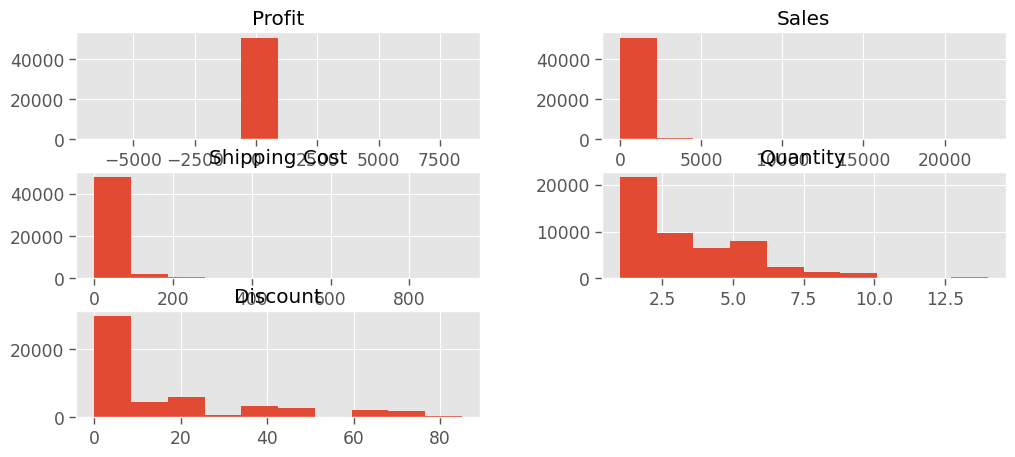

In [88]:
target_numeric.hist()

Text(0.5, 1.0, 'Sales Distribution')

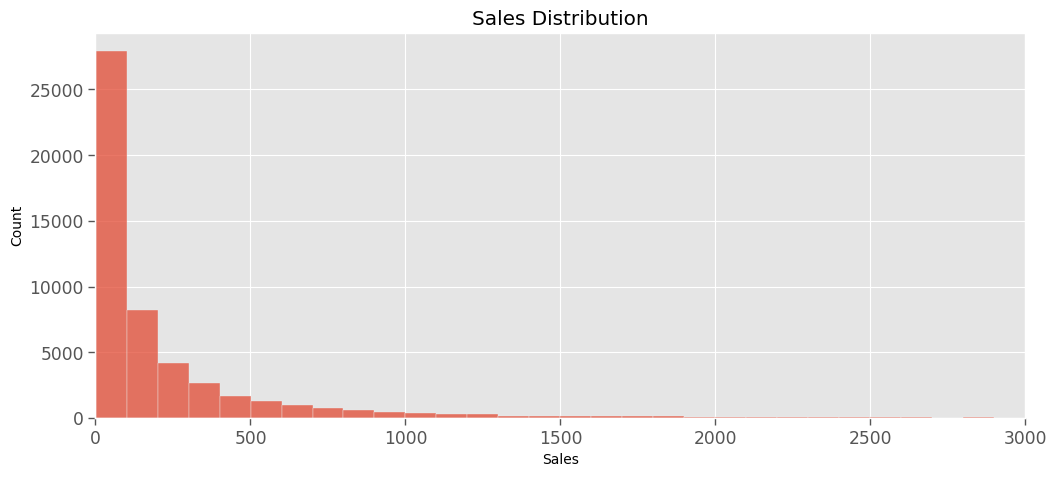

In [89]:
#distribution is heavily skewed to the right
n = target_numeric['Sales'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Sales'])-min(target_numeric['Sales']))/math.sqrt(n)

sales_dist = sns.histplot(data=target_numeric['Sales'], bins=bins, binwidth=bin_width)

sales_dist.set_xlim(0, 3000)
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Sales Distribution')

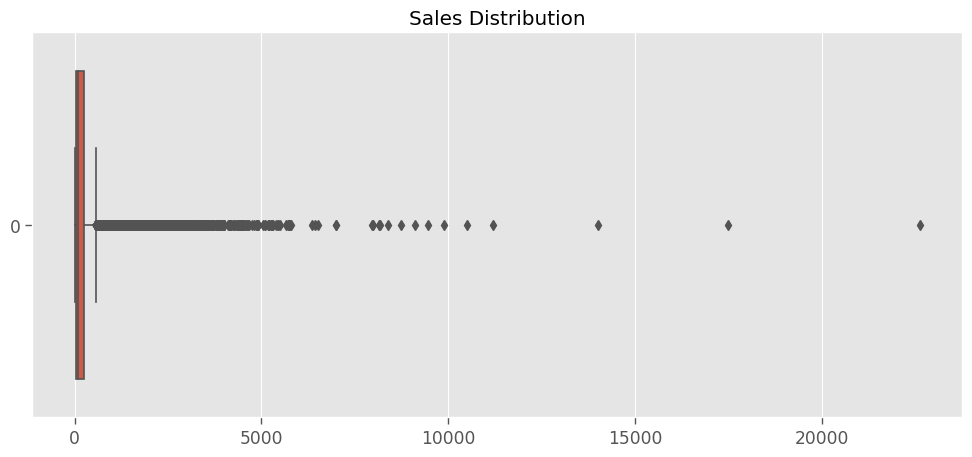

In [90]:
#there are many outliers but they will not be removed for this analysis
sns.boxplot(data=df['Sales'], orient='h')
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Profit Distribution')

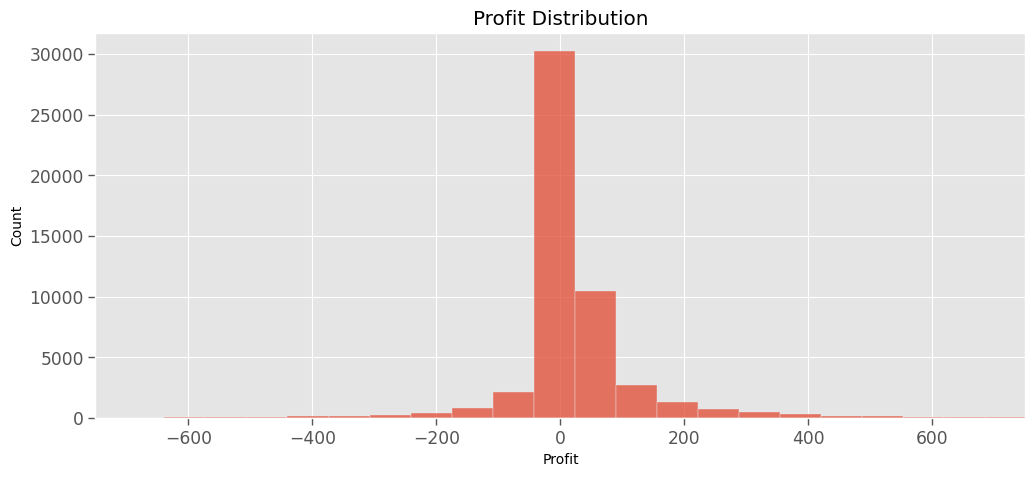

In [91]:
#distribution approximately normally distributed but seems to contain many outliers
n = target_numeric['Profit'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Profit'])-min(target_numeric['Profit']))/math.sqrt(n)

prof_dist = sns.histplot(data=target_numeric['Profit'], bins=bins, binwidth=bin_width)
prof_dist.set_xlim(-750,750)
plt.title('Profit Distribution')

Text(0.5, 1.0, 'Profit Distribution')

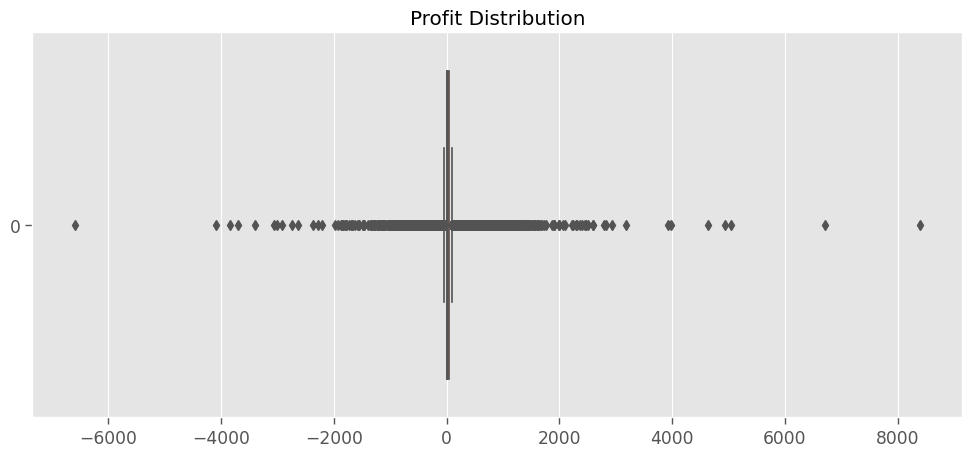

In [92]:
#there are many outliers but they will not be removed for this analysis
sns.boxplot(data=df['Profit'], orient='h')
plt.title('Profit Distribution')

# Metrics by the market #

<Axes: title={'center': 'Sales by Market'}, xlabel='Market', ylabel='Sales'>

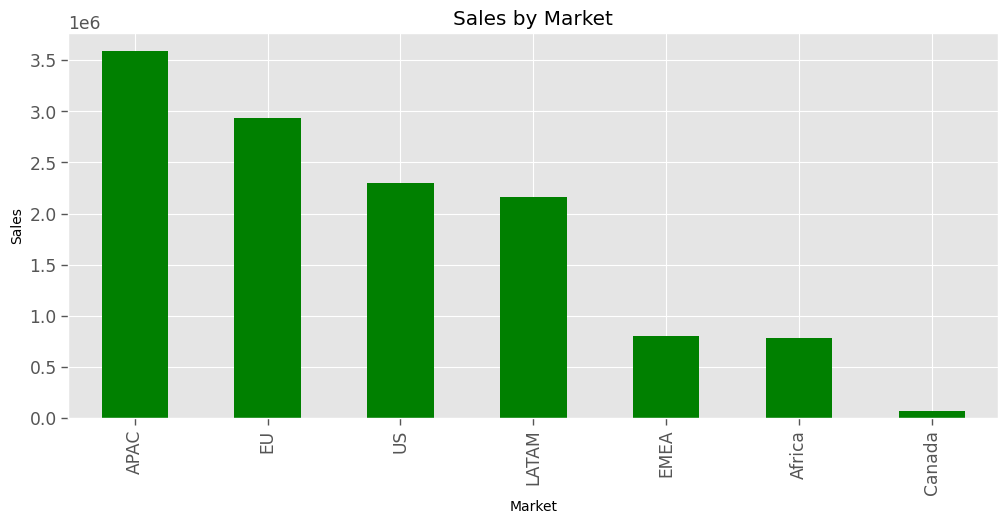

In [93]:
region_sales = df.groupby('Market')[['Sales']].sum().sort_values('Sales', ascending=False)
region_sales.plot(kind='bar', title='Sales by Market', ylabel='Sales',legend=False, color='green')

<Axes: title={'center': 'Profit by Market'}, xlabel='Market', ylabel='Profit'>

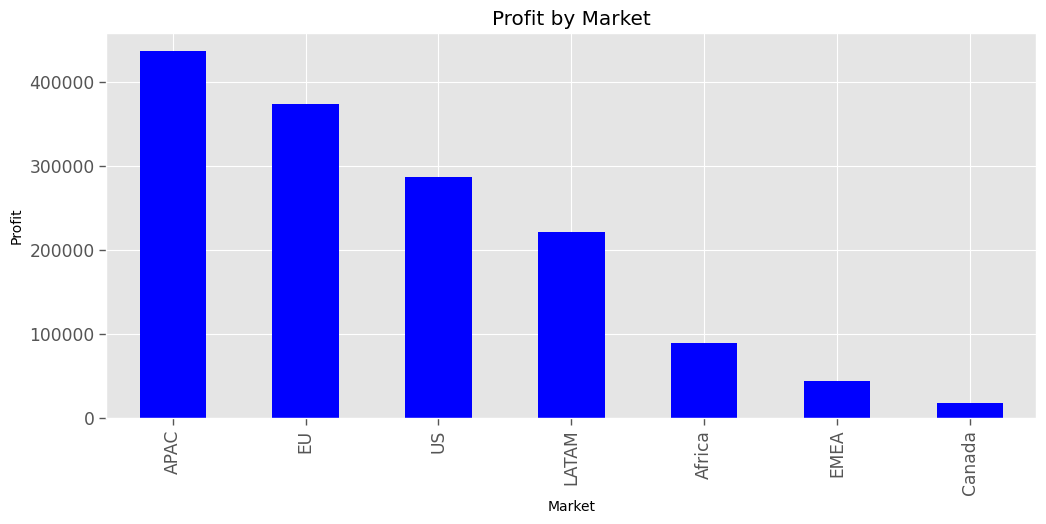

In [94]:
region_profit = df.groupby('Market')[['Profit']].sum().sort_values('Profit', ascending=False)
region_profit.plot(kind='bar', title='Profit by Market',ylabel='Profit', legend=False,color='blue')

<Axes: title={'center': 'Quantity sold by Market'}, xlabel='Market', ylabel='Quantity'>

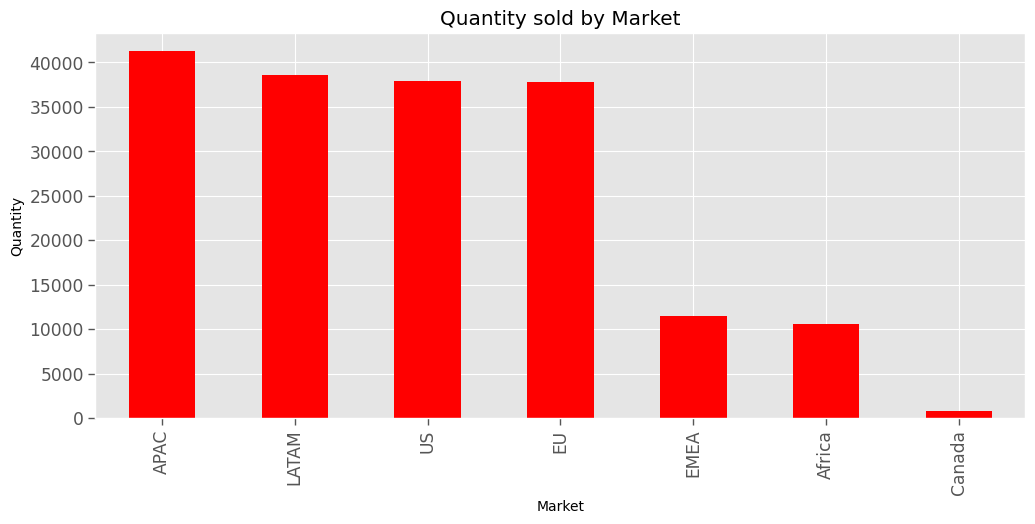

In [95]:
#quantity by region
region_quantity = df.groupby('Market')[['Quantity']].sum().sort_values('Quantity', ascending=False)
region_quantity.plot(kind='bar', title='Quantity sold by Market', ylabel='Quantity',legend=False, color='red')

# Metrics by category #

<Axes: title={'center': 'Categories Ranked by Sales'}, xlabel='Category', ylabel='Sales'>

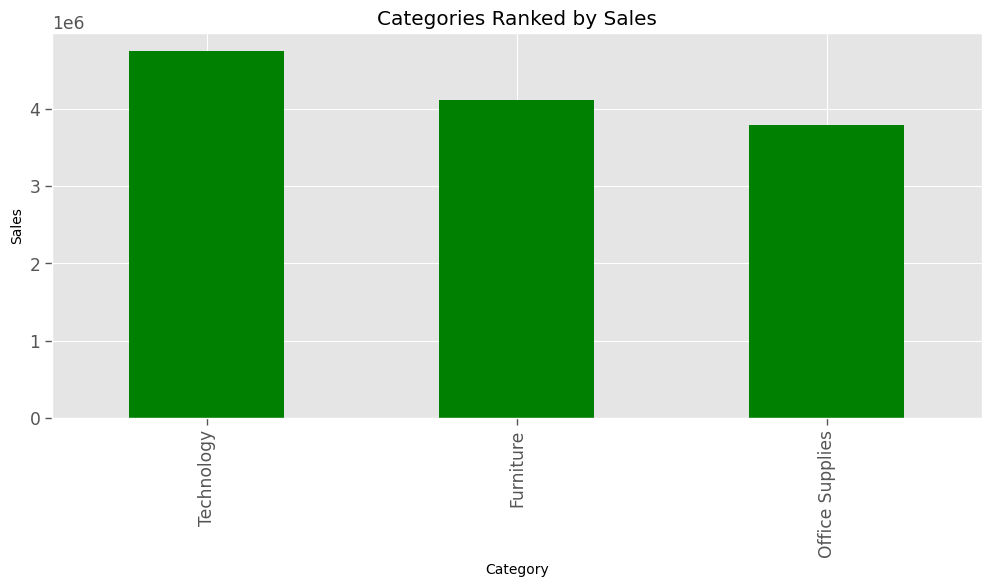

In [96]:
#categories
category_sales = df.groupby('Category')[['Sales']].sum().sort_values('Sales', ascending=False)
category_sales.plot(kind='bar', title='Categories Ranked by Sales', ylabel='Sales', legend=False, color='green')

<Axes: title={'center': 'Categories Ranked by Profit'}, xlabel='Category', ylabel='Profit'>

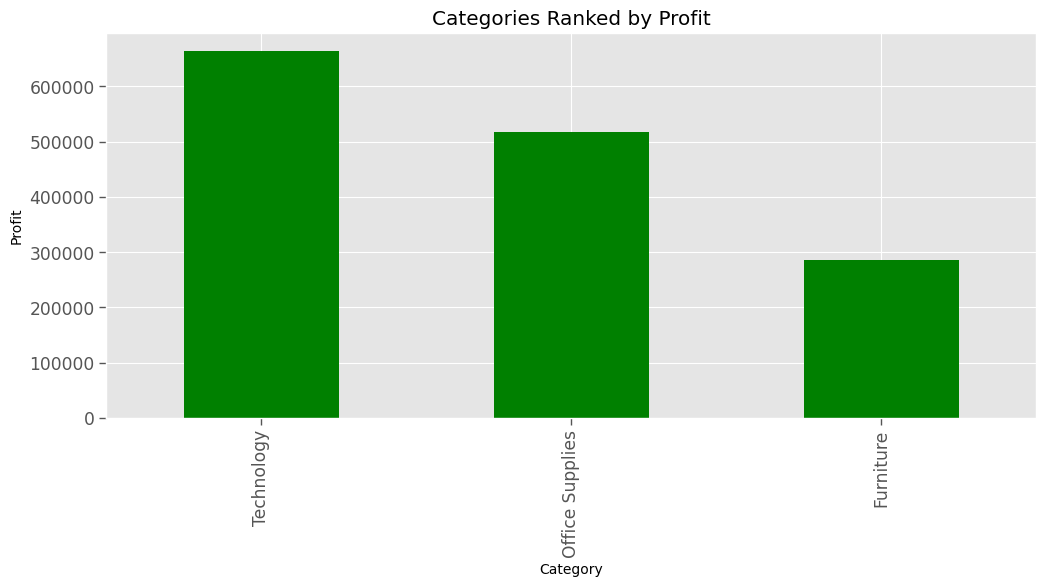

In [97]:
category_profit = df.groupby('Category')[['Profit']].sum().sort_values('Profit', ascending=False)
category_profit.plot(kind='bar', title='Categories Ranked by Profit', ylabel='Profit',legend=False, color='green')

# Time series analysis of orders placed, gross, profit, and discounts #
__When are customers most commonly placing orders?__ <br>
__How has gross and net changed from 2011-2014?__ <br>
__How has the number of discounts changed?__

In [98]:
year = df['Order Date'].str[-4::]
month = df['Order Date'].str[3:5]
df['Year'] = year
df['Month'] = month

In [99]:
df_2011 = df.loc[df['Year'] == '2011'].copy()
df_2012 = df.loc[df['Year'] == '2012'].copy()
df_2013 = df.loc[df['Year'] == '2013'].copy()
df_2014 = df.loc[df['Year'] == '2014'].copy()

Text(0.5, 0.98, 'Number of Sales Over Time')

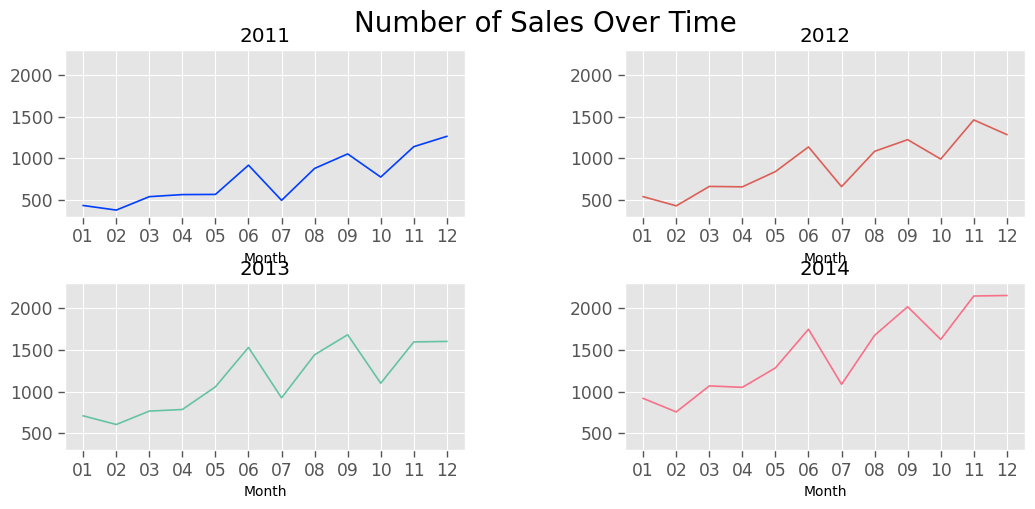

In [100]:
#number of sales 

fig, ax = plt.subplots(2,2)

#2011
plt.subplot(2, 2, 1)
plt.title('2011')
date_group = df_2011.groupby('Month')[['Month']].count()
a = sns.lineplot(date_group, legend=False, palette='bright')
a.set_ylim(300,2300)

#2012
plt.subplot(2, 2, 2)
plt.title('2012')
date_group = df_2012.groupby('Month')[['Month']].count()
b = sns.lineplot(date_group, legend=False, palette=sns.color_palette('hls',1))
b.set_ylim(300,2300)

#2013
plt.subplot(2, 2, 3)
plt.title('2013')
date_group = df_2013.groupby('Month')[['Month']].count()
c = sns.lineplot(date_group, legend=False, palette=sns.color_palette('Set2',1))
c.set_ylim(300,2300)

#2014
plt.subplot(2, 2, 4)
plt.title('2014')
date_group = df_2014.groupby('Month')[['Month']].count()
d = sns.lineplot(date_group, legend=False, palette=sns.color_palette('husl',1))
d.set_ylim(300,2300)

#subplot and title details
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle('Number of Sales Over Time', fontsize=20)

## Cummulative sales and profit over time ##

Text(0.5, 0.98, 'Sales and Profit Amount Over Time')

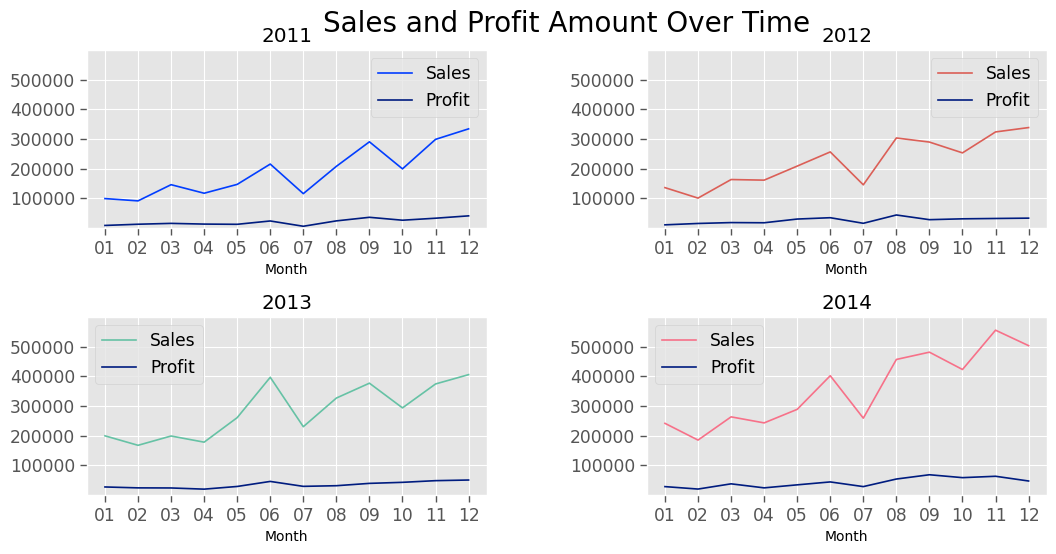

In [101]:
#when are overall sales the highest
fig, ax = plt.subplots(2,2)
y_ticks = np.arange(100000,600000,100000)

#2011
plt.subplot(2, 2, 1)
plt.title('2011')
date_group = df_2011.groupby('Month')[['Sales']].sum()
profit = df_2011.groupby('Month')[['Profit']].sum()
a = sns.lineplot(date_group, legend=True, palette='bright') #sales
aa = sns.lineplot(profit, legend=True, palette='dark') #profit
a.set_ylim(0,600000)
plt.yticks(y_ticks)

#2012
plt.subplot(2, 2, 2)
plt.title('2012')
date_group = df_2012.groupby('Month')[['Sales']].sum()
profit = df_2012.groupby('Month')[['Profit']].sum()
b = sns.lineplot(date_group, legend=True, palette=sns.color_palette('hls',1)) #sales
bb = sns.lineplot(profit, legend=True, palette='dark') #profit
b.set_ylim(0,600000)
plt.yticks(y_ticks)

#2013
plt.subplot(2, 2, 3)
plt.title('2013')
date_group = df_2013.groupby('Month')[['Sales']].sum()
profit = df_2013.groupby('Month')[['Profit']].sum()
c = sns.lineplot(date_group, legend=True, palette=sns.color_palette('Set2',1)) #sales
cc = sns.lineplot(profit, legend=True, palette='dark') #profit
c.set_ylim(0,600000)
plt.yticks(y_ticks)

#2014
plt.subplot(2, 2, 4)
plt.title('2014')
date_group = df_2014.groupby('Month')[['Sales']].sum()
profit = df_2014.groupby('Month')[['Profit']].sum()
d = sns.lineplot(date_group, legend=True, palette=sns.color_palette('husl',1)) #sales
dd = sns.lineplot(profit, legend=True, palette='dark') #profit
d.set_ylim(0,600000)
plt.yticks(y_ticks)

#subplot and title details
plt.subplots_adjust(left=0.1, bottom=0.01, right=0.9, top=0.9, wspace=0.4, hspace=0.5)
fig.suptitle('Sales and Profit Amount Over Time', fontsize=20)

Text(0.5, 0.98, 'Number of Discounts per Month')

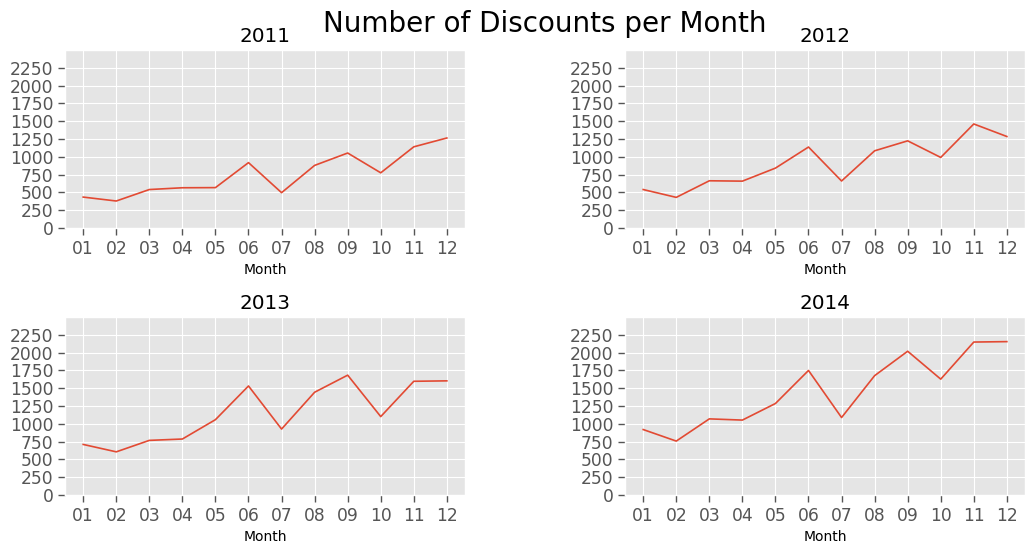

In [102]:
#time series of # of discounts 
fig, ax = plt.subplots(2,2)
y_ticks = np.arange(0,2500,250)

#2011
plt.subplot(2, 2, 1)
plt.title('2011')
discounts = df_2011.groupby('Month')[['Discount']].count()
a = sns.lineplot(discounts, legend=False)
a.set_ylim(0, 2500)
plt.yticks(y_ticks)

#2012
plt.subplot(2, 2, 2)
plt.title('2012')
discounts = df_2012.groupby('Month')[['Discount']].count()
b = sns.lineplot(discounts, legend=False)
b.set_ylim(0, 2500)
plt.yticks(y_ticks)

#2013
plt.subplot(2, 2, 3)
plt.title('2013')
discounts = df_2013.groupby('Month')[['Discount']].count()
c = sns.lineplot(discounts, legend=False)
c.set_ylim(0, 2500)
plt.yticks(y_ticks)

#2014
plt.subplot(2, 2, 4)
plt.title('2014')
discounts = df_2014.groupby('Month')[['Discount']].count()
d = sns.lineplot(discounts, legend=False)
d.set_ylim(0, 2500)
plt.yticks(y_ticks)

#subplot and title details
plt.subplots_adjust(left=0.1, bottom=0.01, right=0.9, top=0.9, wspace=0.4, hspace=0.5)
fig.suptitle('Number of Discounts per Month', fontsize=20)

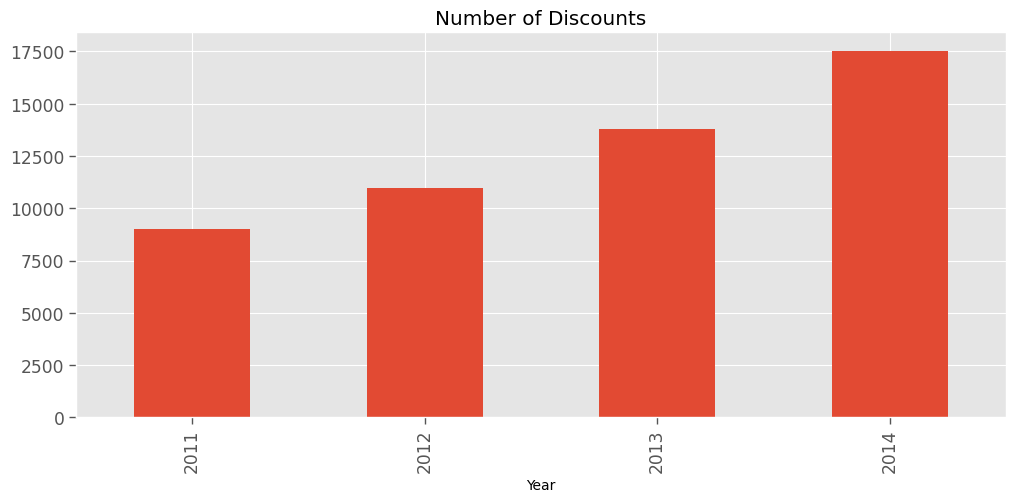

In [103]:
#what year had the most discounts?
disc_by_year = df.groupby('Year')[['Discount']].count()

disc_by_year.plot(kind='bar',legend=False)
plt.title('Number of Discounts')
plt.show()

number of units sold and gross increased in the year 2014 but profit did not increase as much - perhaps due to the increase in discounts. 

# Analyzing the distribution of discount percentage and its relationship to sales and profit #

In [104]:
#21820 entries with discounts
discount_df = df.loc[df['Discount'] > 0].copy()
discount_df.shape

(21820, 26)

In [105]:
discounts = discount_df.groupby(by='Discount')
dis_counts = discount_df.groupby(by='Discount').count()

disc_2014 = discount_df.loc[discount_df['Year'] == '2014']
discounts_2014 = disc_2014.groupby(by='Discount')

dis_2014_counts = disc_2014.groupby(by='Discount').count()


## What percentage of orders are profitable? ##

In [106]:
#what proportion does each discount percentage make
disc_percentages = df['Discount'].unique()
disc_percentages.sort()
disc_percentages = np.delete(disc_percentages, 0)
prop_num = []
proportions = []
perc_prof = []



for perc in disc_percentages:
    #distribution of discount percentages
    num = len(discount_df.loc[discount_df['Discount'] == perc])
    prop = 100 * num / len(discount_df['Discount'])
    prop_num.append(num)
    proportions.append(prop)
    
    #percent of orders at this percent that are profitable
    prof_len = len(discount_df.loc[(discount_df['Discount'] == perc) & (discount_df['Profit'] > 0)])
    perc_len = len(discount_df.loc[discount_df['Discount']== perc])
    prof = 100 * (prof_len/perc_len)
    perc_prof.append(prof)

In [107]:
#dataframe of discount percentage
discount_info = pd.DataFrame()
discount_info['Discount'] = disc_percentages
discount_info['Count'] = prop_num
discount_info['Proportion Percent'] = proportions
discount_info['Percent Profitable'] = perc_prof

In [108]:
discount_info

,Discount,Count,Proportion Percent,Percent Profitable
0,7,150,0.687443,80.000000
1,10,4068,18.643446,78.638151
2,15,541,2.479377,62.846580
3,17,735,3.368469,67.891156
4,20,5039,23.093492,78.408414
5,25,198,0.907424,50.505051
6,27,388,1.778185,49.226804
7,30,340,1.558203,13.529412
8,32,27,0.123740,0.000000
9,35,122,0.559120,31.147541


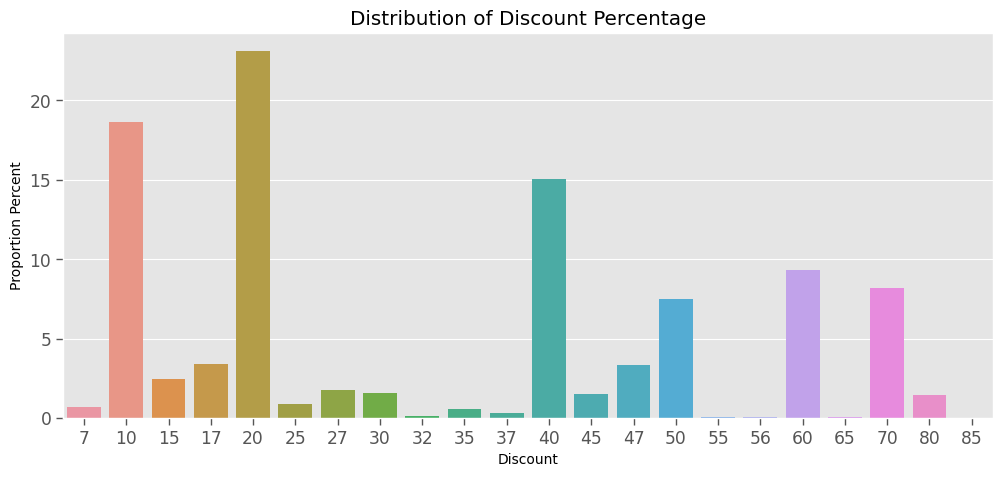

In [109]:
sns.barplot(data=discount_info, x='Discount', y='Proportion Percent')
plt.title("Distribution of Discount Percentage")
plt.show()

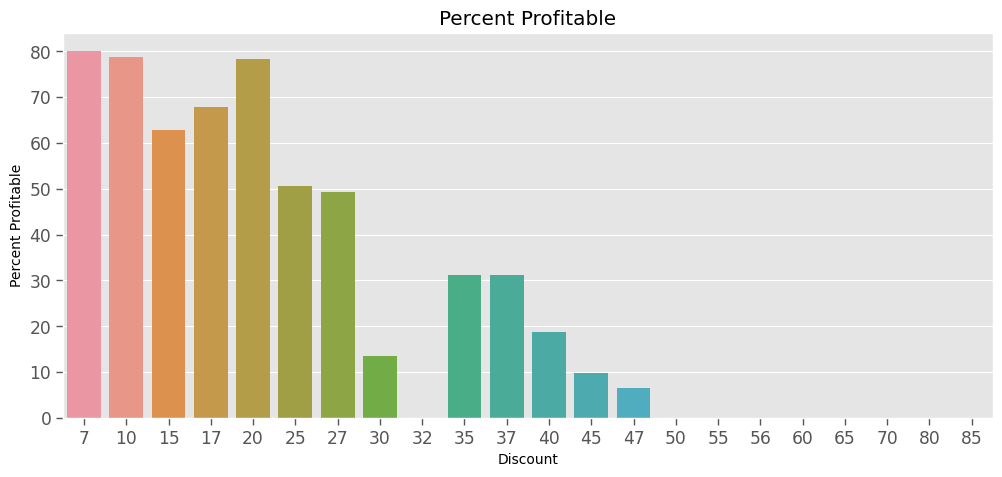

In [110]:
sns.barplot(data=discount_info, x='Discount', y='Percent Profitable')
plt.title("Percent Profitable")
plt.show()

In [111]:
#what percentage of total sales are profitable
percent_profitable = 100 * (len(df.loc[df['Profit'] > 0])/len(df))
not_prof =  100 * (1 - (percent_profitable/100))

percent_discounted = 100 * (len(discount_df)/len(df))
not_disc = 100 * (1 - (percent_discounted/100))

disc_profitable = 100 * (len(discount_df.loc[discount_df['Profit'] > 0])/len(discount_df))
not_prof_disc = 100 * (1 - (disc_profitable/100))


# above_20 = 100 * (len(discount_df.loc[discount_df['Discount']>20]))/len(discount_df)


# print('% of total purchases with profit > 0$: ',percent_profitable)
# print()
# print('% purchases with a discount: ',percent_discounted)
# print('% discounted purchases with profit > 0$: ',disc_profitable)
# print()
# print('% of orders with discount > 20%: ', above_20)

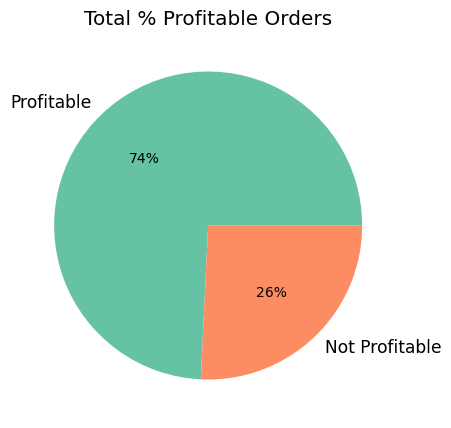

In [112]:
#total profitable orders
plt.pie(x=[percent_profitable, not_prof], labels=['Profitable','Not Profitable'], colors=sns.color_palette('Set2'), autopct='%.0f%%')
plt.title('Total % Profitable Orders')
plt.show()

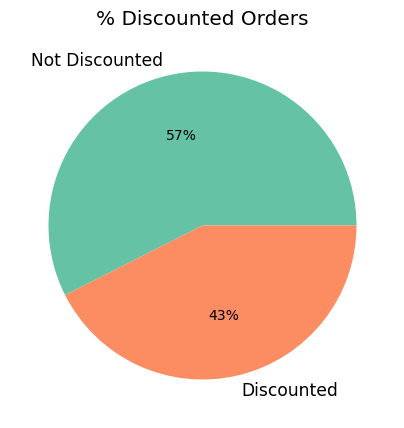

In [113]:
#percent discounted
#total profitable orders
plt.pie(x=[not_disc, percent_discounted], labels=['Not Discounted','Discounted'], colors=sns.color_palette('Set2'), autopct='%.0f%%')
plt.title('% Discounted Orders')
plt.show()

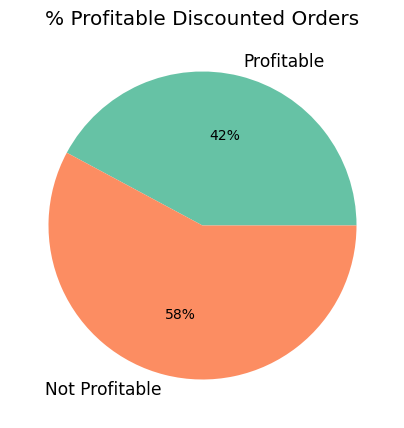

In [114]:
#profitable discounted
#percent discounted
#total profitable orders
plt.pie(x=[disc_profitable, not_prof_disc], labels=['Profitable','Not Profitable'], colors=sns.color_palette('Set2'), autopct='%.0f%%')
plt.title('% Profitable Discounted Orders')
plt.show()

# What factors most contribute to profit? #

## Determining the direction and strength of relationship between profit and other variables #

Text(0.5, 1.0, 'Features Correlating with Profit')

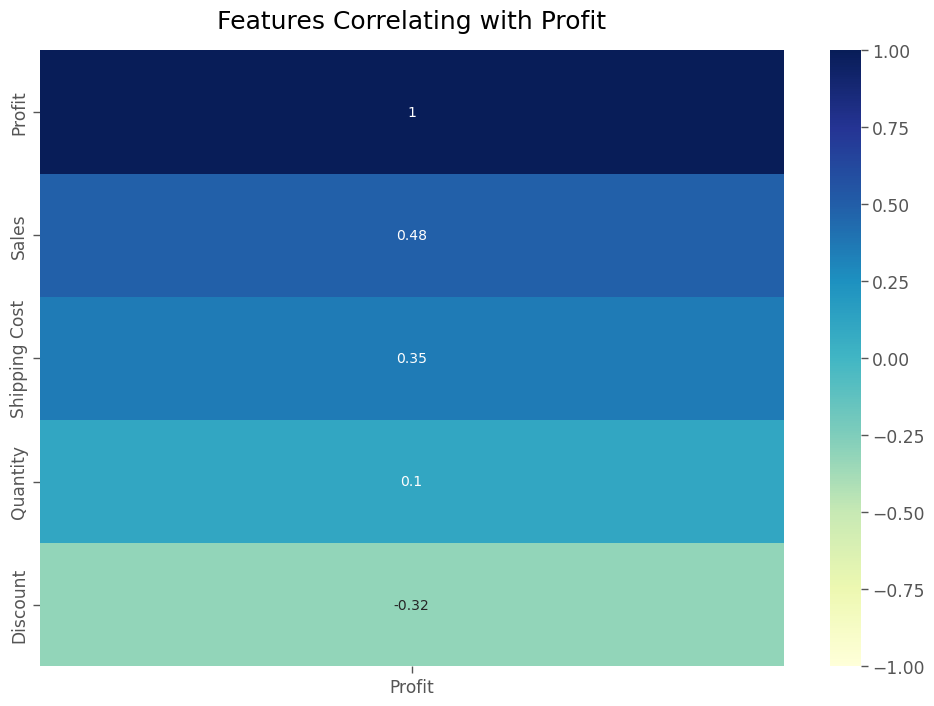

In [115]:
corr = target_numeric.corr()[['Profit']].sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12,8))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with Profit', fontdict={'fontsize':18}, pad=16)

## Predict profit with simple linear regression ##

r^2: 0.2351455759464039


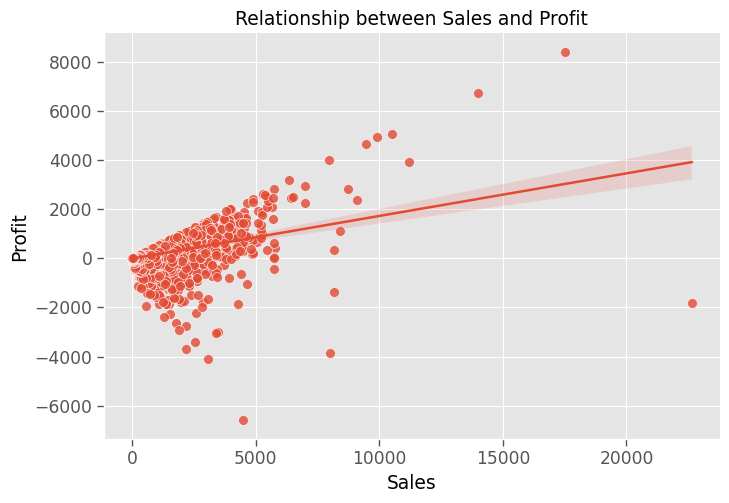

In [116]:
#sales vs profit
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Sales', y='Profit', data=df, height=5, aspect=1.5
           ,scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})
r2 = (df['Sales'].corr(df['Profit']))**2
plt.title('Relationship between Sales and Profit')
print(f'r^2: {r2}')

## Taking a closer look at the relationship between sales, profit, and discounts ##

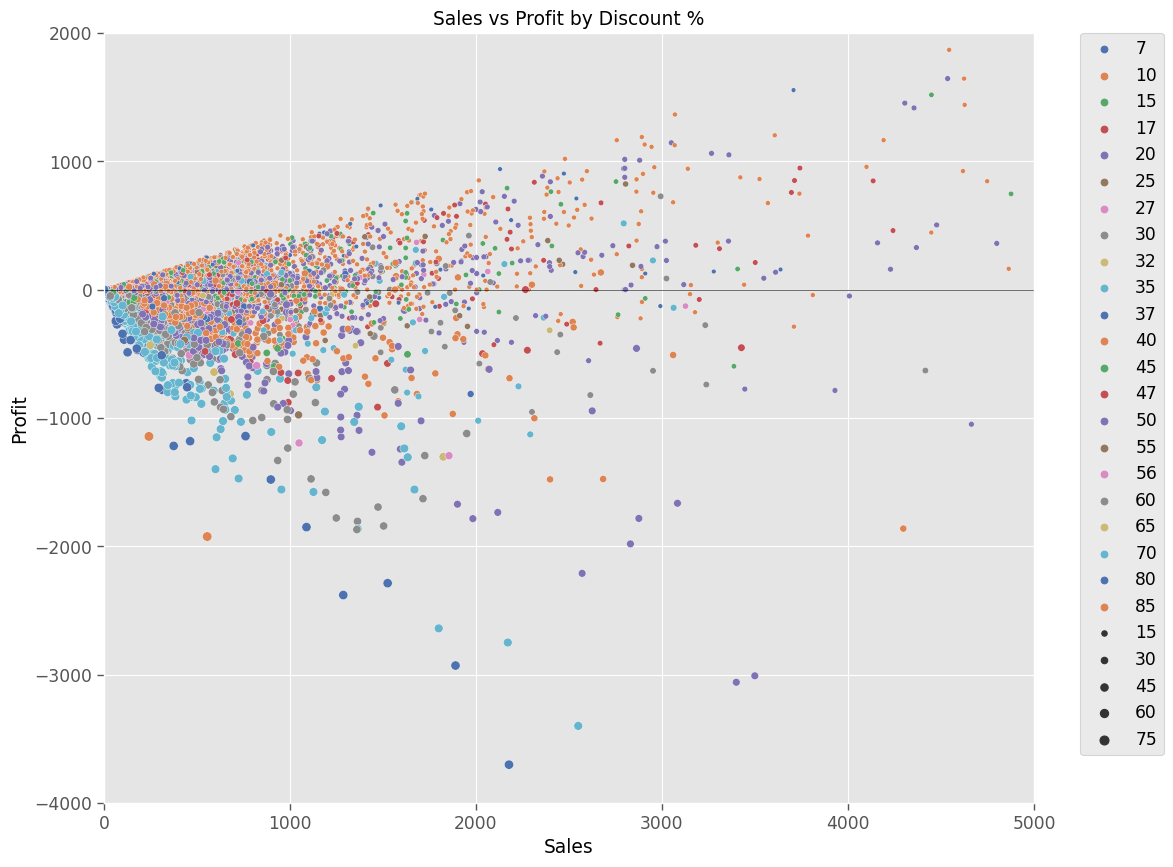

In [117]:
#sales vs profit with discount as both size and color
    #Sales 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlim(0, 5000)
ax.set_ylim(-4000,2000)

sns.scatterplot(data=discount_df, x='Sales', y='Profit', size='Discount', hue='Discount', palette='deep')

plt.axhline(y=0,linewidth=0.4, color='k')

plt.title('Sales vs Profit by Discount %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


plt.show()

<Figure size 1200x500 with 0 Axes>

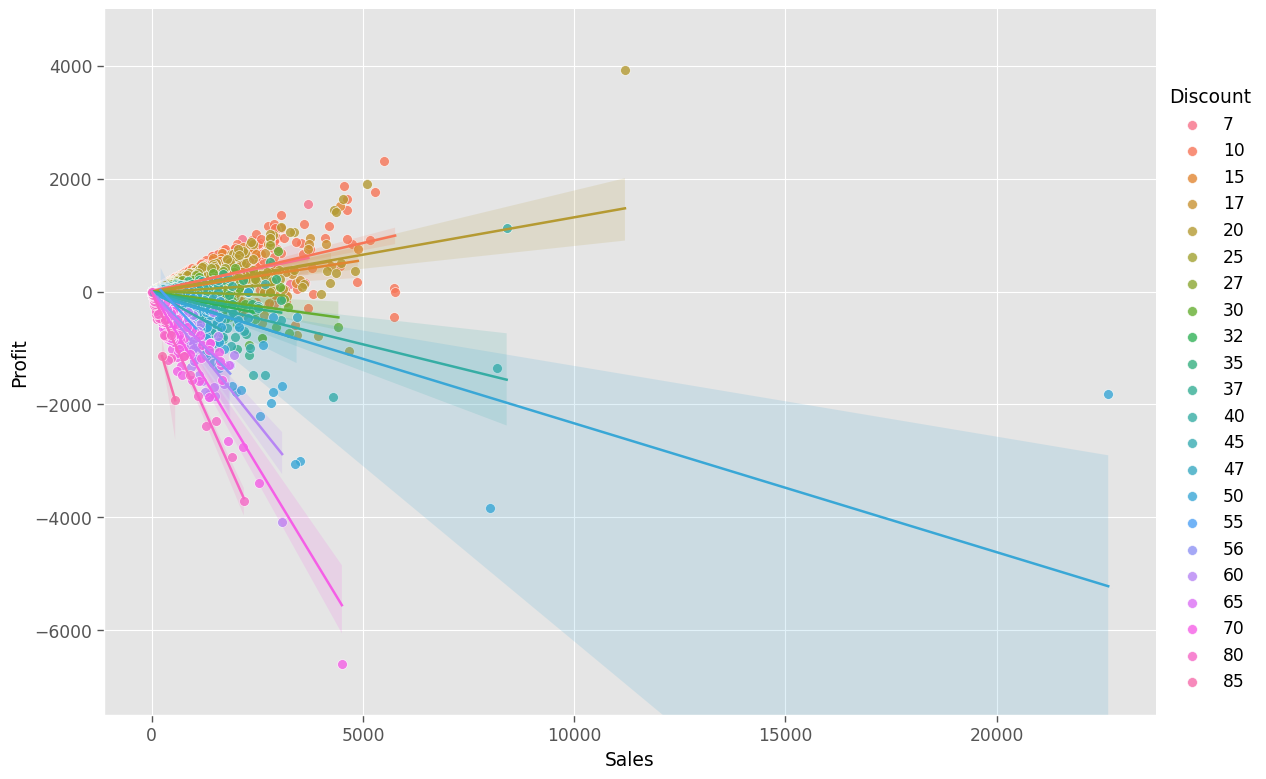

In [118]:
fig = plt.figure()

sns.set_context('paper', font_scale=1.4)
ax = sns.lmplot(x='Sales', y='Profit', data=discount_df, hue='Discount', height=8, aspect=1.5,
               scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})

ax.set(ylim=(-7500,5000))

plt.show()

In [119]:
#grouping by discount percentage
low_disc = discount_df.loc[(discount_df['Discount'] >= 7) & (discount_df['Discount'] <= 20)].copy() #7-20
med_disc = discount_df.loc[(discount_df['Discount'] > 20) & (discount_df['Discount'] <= 50)].copy()#25-50
high_disc = discount_df.loc[discount_df['Discount'] > 50].copy() #55-85

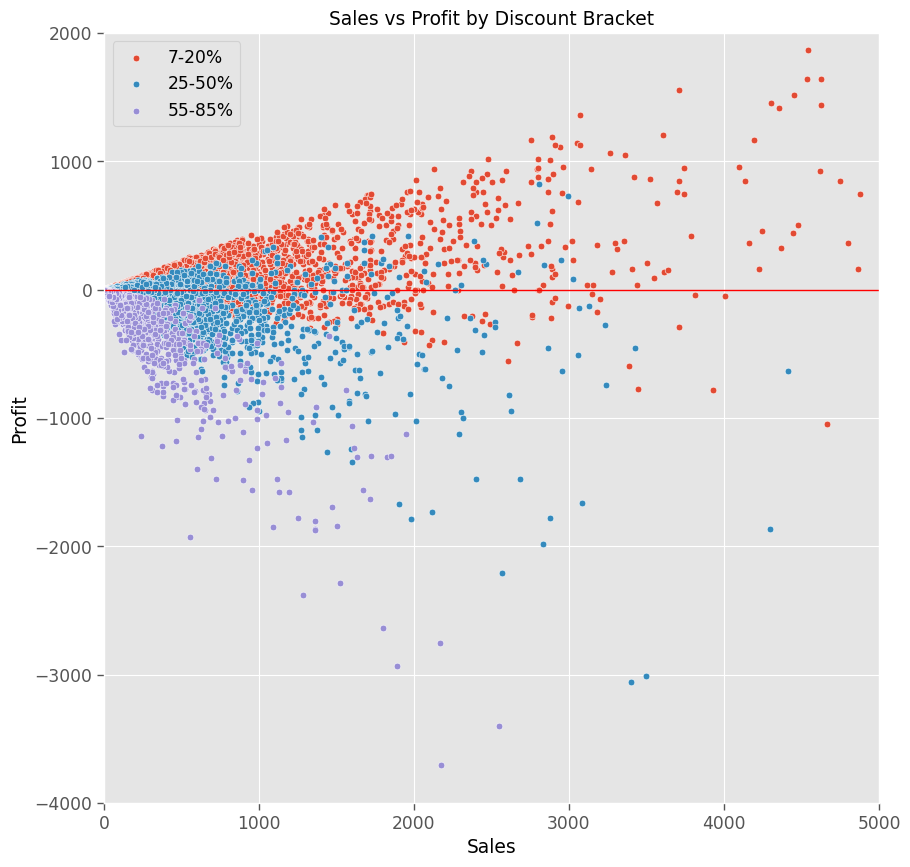

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0, 5000)
ax.set_ylim(-4000,2000)

low = sns.scatterplot(data=low_disc, x='Sales', y='Profit',label='7-20%') #7-20
med = sns.scatterplot(data=med_disc, x='Sales', y='Profit',label='25-50%') #25-50
high = sns.scatterplot(data=high_disc, x='Sales', y='Profit',label='55-85%') #55-85

plt.axhline(y=0,linewidth=1, color='red')
plt.title('Sales vs Profit by Discount Bracket')

plt.show()

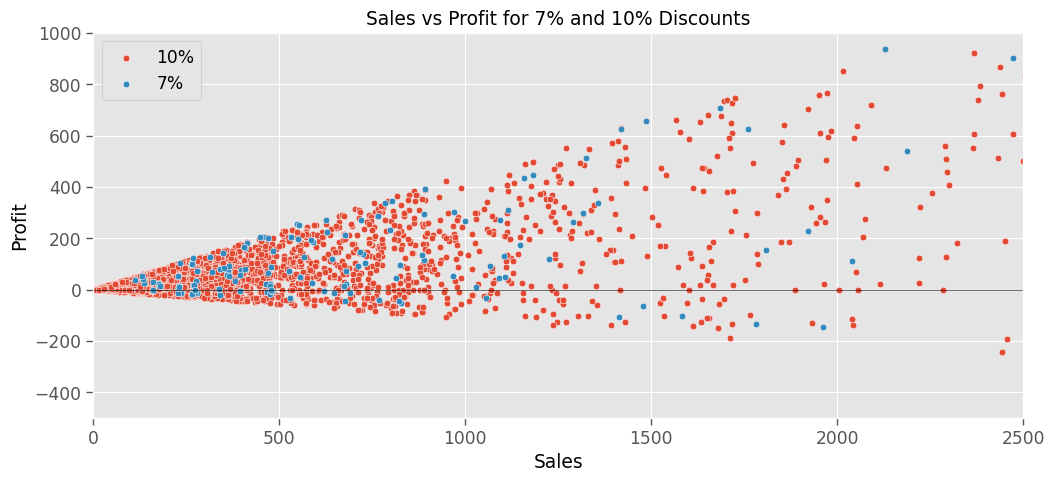

In [121]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots()
ax.set_xlim(0, 2500)
ax.set_ylim(-500,1000)


seven_percent = discount_df.loc[discount_df['Discount'] == 7]
ten_percent = discount_df.loc[discount_df['Discount'] == 10]

ten = sns.scatterplot(data=ten_percent, x='Sales', y='Profit',legend='full', label='10%')
seven = sns.scatterplot(data=seven_percent, x='Sales', y='Profit',legend='full', label='7%')


plt.axhline(y=0,linewidth=0.4, color='k')
plt.title('Sales vs Profit for 7% and 10% Discounts')

plt.show()

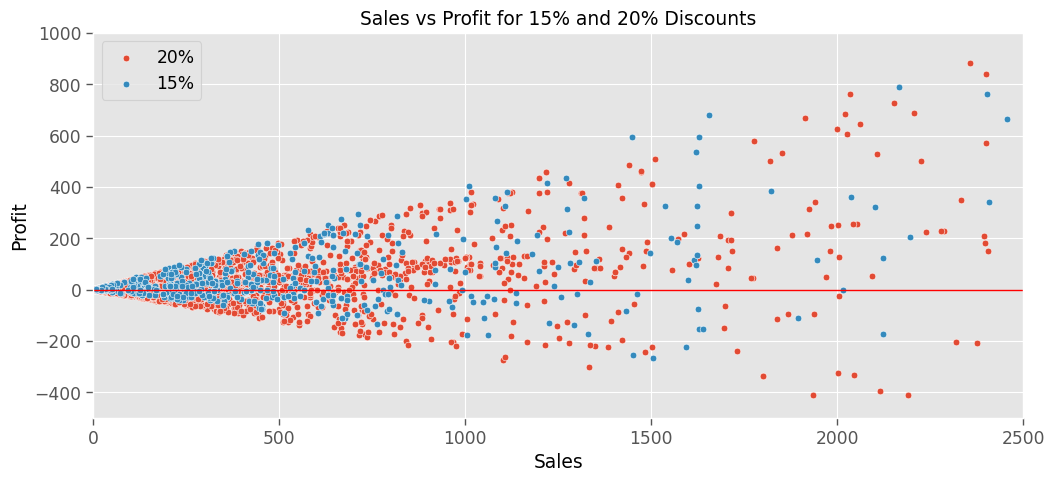

In [122]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots()
ax.set_xlim(0, 2500)
ax.set_ylim(-500,1000)

fifteen_percent = discount_df.loc[discount_df['Discount'] == 15]
twenty_percent = discount_df.loc[discount_df['Discount'] == 20]

twenty = sns.scatterplot(data=twenty_percent, x='Sales', y='Profit',legend='full', label='20%')
fifteen = sns.scatterplot(data=fifteen_percent, x='Sales', y='Profit',legend='full', label='15%')

plt.axhline(y=0,linewidth=1, color='red')
plt.title('Sales vs Profit for 15% and 20% Discounts')

plt.show()

kde plot estimates the probability density function of continuous data

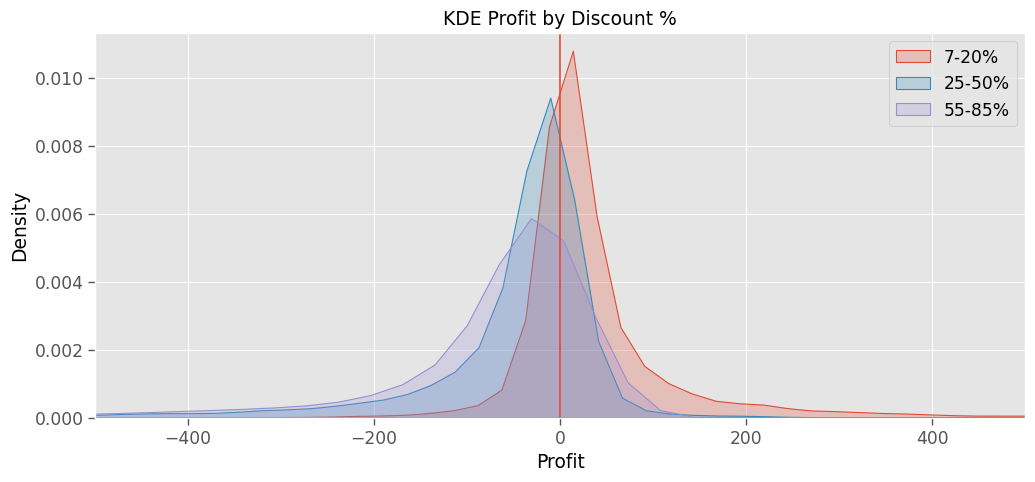

In [123]:
fig,ax = plt.subplots()

sns.kdeplot(low_disc['Profit'], label='7-20%', fill=True)
sns.kdeplot(med_disc['Profit'], label='25-50%', fill=True)
sns.kdeplot(high_disc['Profit'], label='55-85%', fill=True)

plt.axvline(x=0)

ax.set_xlim(-500,500)
plt.title('KDE Profit by Discount %')
plt.legend()
plt.show()

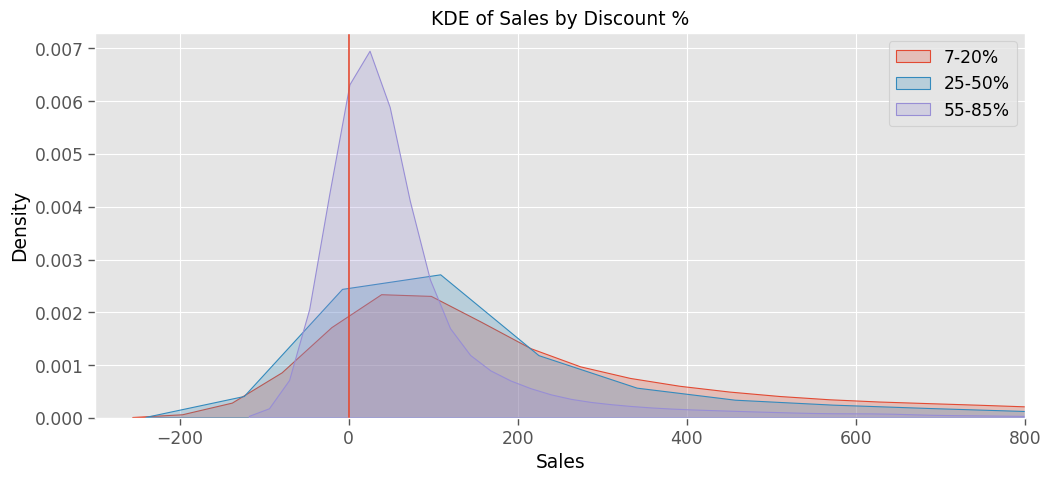

In [124]:
fig,ax = plt.subplots()

sns.kdeplot(low_disc['Sales'], label='7-20%', fill=True)
sns.kdeplot(med_disc['Sales'], label='25-50%', fill=True)
sns.kdeplot(high_disc['Sales'], label='55-85%', fill=True)

plt.axvline(x=0)

ax.set_xlim(-300,800)
plt.title('KDE of Sales by Discount %')
plt.legend()
plt.show()

## Shipping cost and profit ##

r^2: 0.5899358839955589


Text(0.5, 1.0, '')

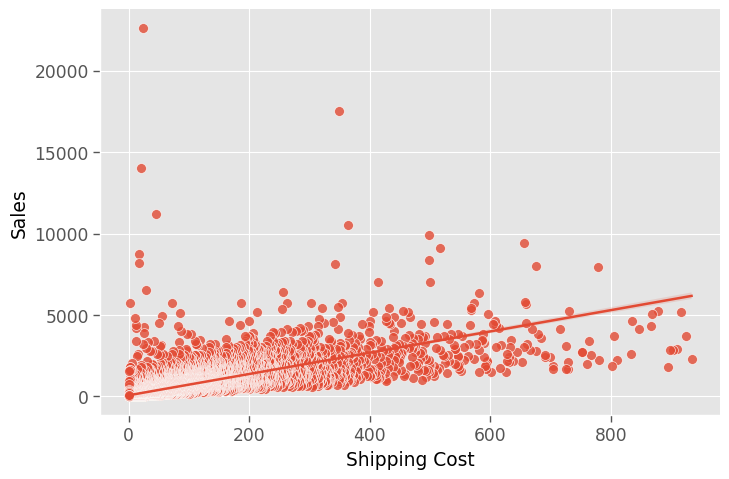

In [125]:
#shipping cost vs sales
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Shipping Cost', y='Sales', data=df, height=5, aspect=1.5
           ,scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})

r2 = (df['Sales'].corr(df['Shipping Cost']))**2
print(f'r^2: {r2}')
plt.title('')

r^2: 0.12562835267929534


Text(0.5, 1.0, '')

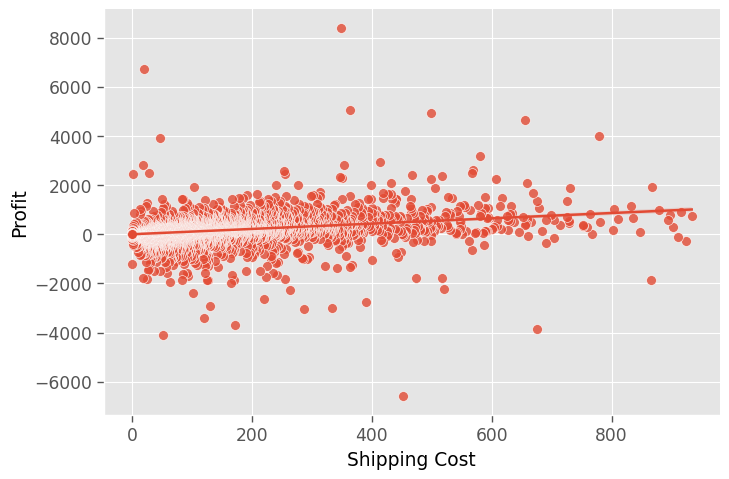

In [126]:
#shipping cost vs sales
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Shipping Cost', y='Profit', data=df, height=5, aspect=1.5
           ,scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})

r2 = (df['Profit'].corr(df['Shipping Cost']))**2
print(f'r^2: {r2}')
plt.title('')

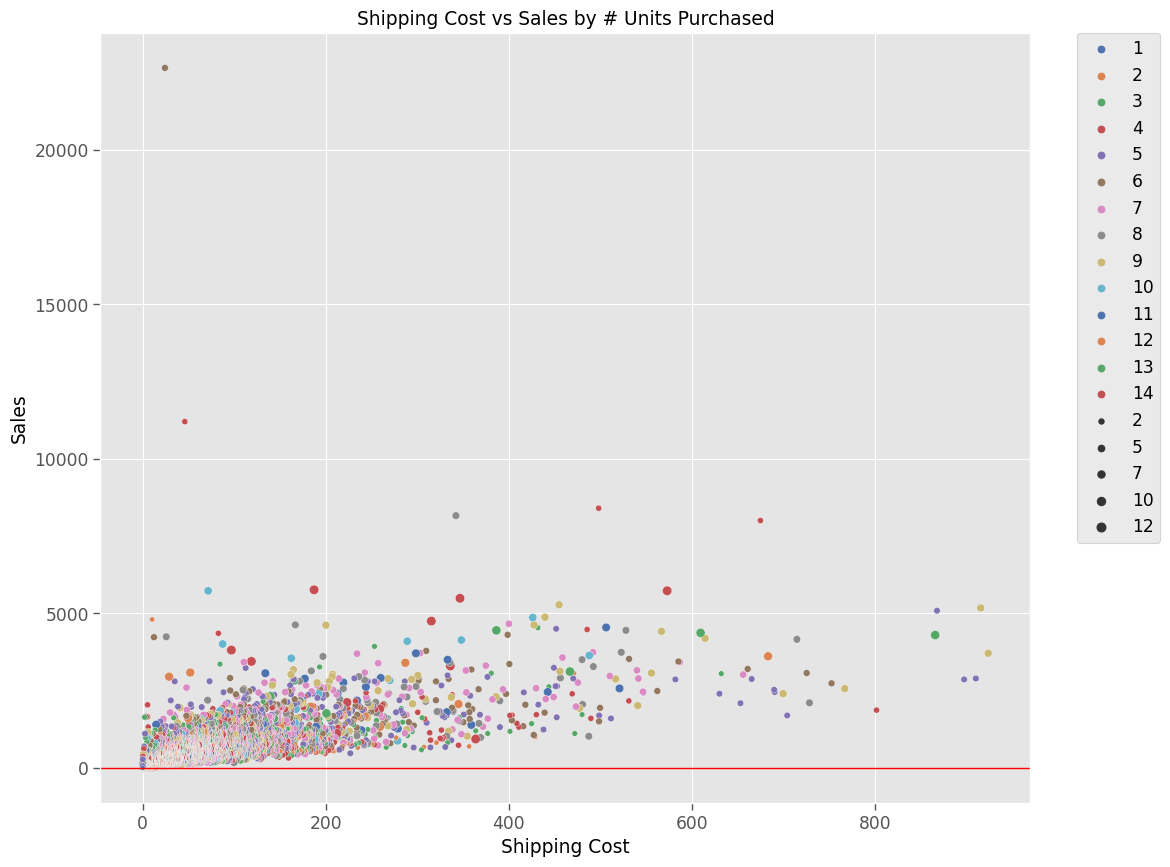

In [127]:
#sales vs profit with discount as both size and color
    #Sales 
fig, ax = plt.subplots(figsize=(12,10))
#ax.set_xlim(0, 1000)

sns.scatterplot(data=discount_df, x='Shipping Cost', y='Sales', size='Quantity', hue='Quantity', palette='deep')

plt.axhline(y=0,linewidth=1, color='red')

plt.title('Shipping Cost vs Sales by # Units Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


plt.show()

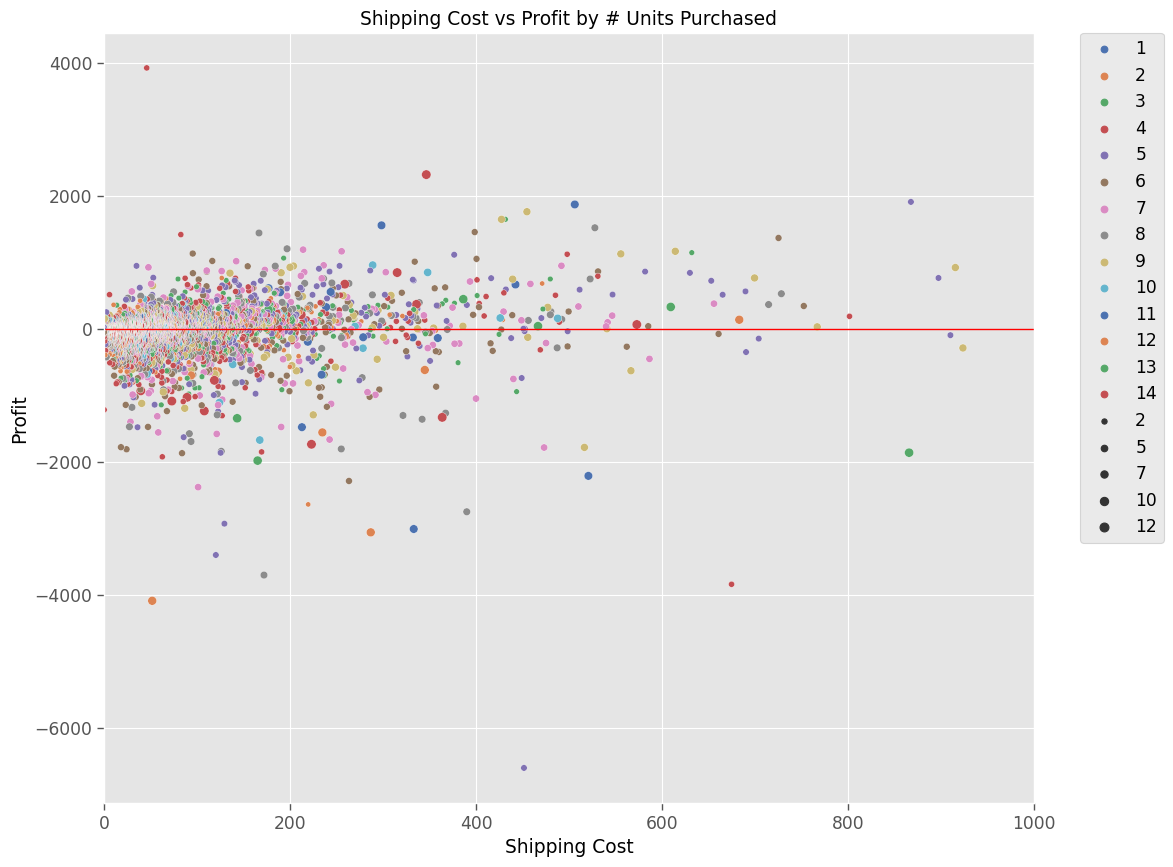

In [128]:
#sales vs profit with discount as both size and color
    #Sales 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlim(0, 1000)

sns.scatterplot(data=discount_df, x='Shipping Cost', y='Profit', size='Quantity', hue='Quantity', palette='deep')

plt.axhline(y=0,linewidth=1, color='red')

plt.title('Shipping Cost vs Profit by # Units Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


plt.show()

In [129]:
#1-5,6-10,11-14
one_five = df.loc[(df['Quantity'] >= 1) & (df['Quantity'] <= 5)]
six_ten = df.loc[(df['Quantity'] >= 6) & (df['Quantity'] <= 10)]
eleven_fourteen = df.loc[df['Quantity'] >= 11]

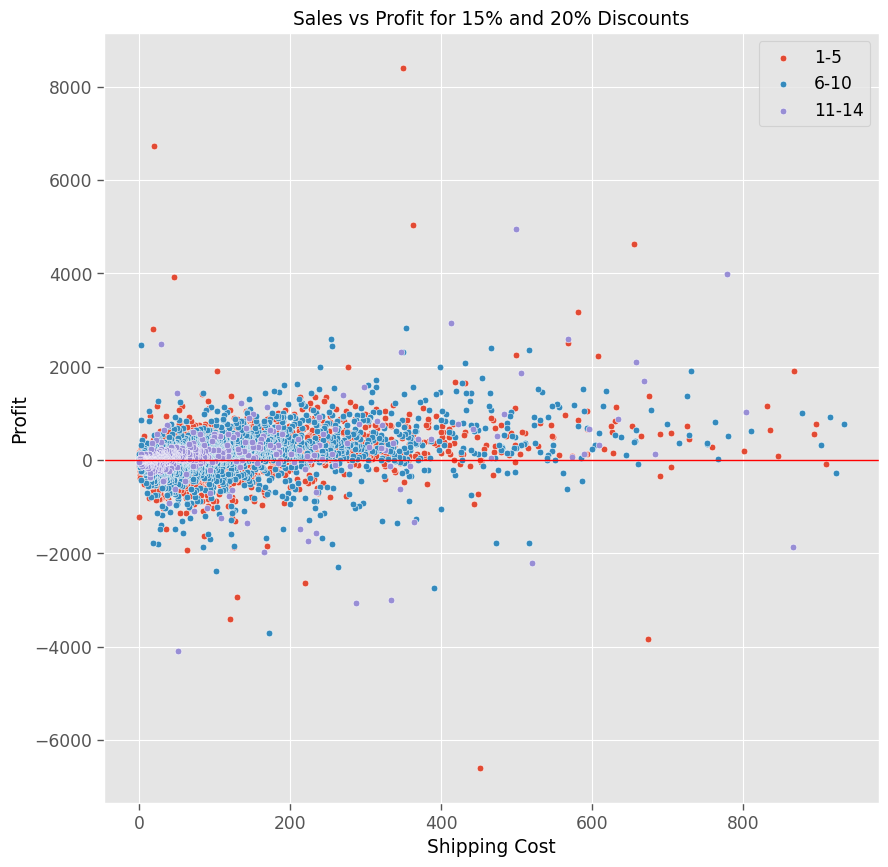

In [130]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=one_five, x='Shipping Cost', y='Profit',legend='full', label='1-5') #1-5
sns.scatterplot(data=six_ten, x='Shipping Cost', y='Profit',legend='full', label='6-10') #6-10
sns.scatterplot(data=eleven_fourteen, x='Shipping Cost', y='Profit',legend='full', label='11-14') #11-14

plt.axhline(y=0,linewidth=1, color='red')
plt.title('Sales vs Profit for 15% and 20% Discounts')


plt.show()

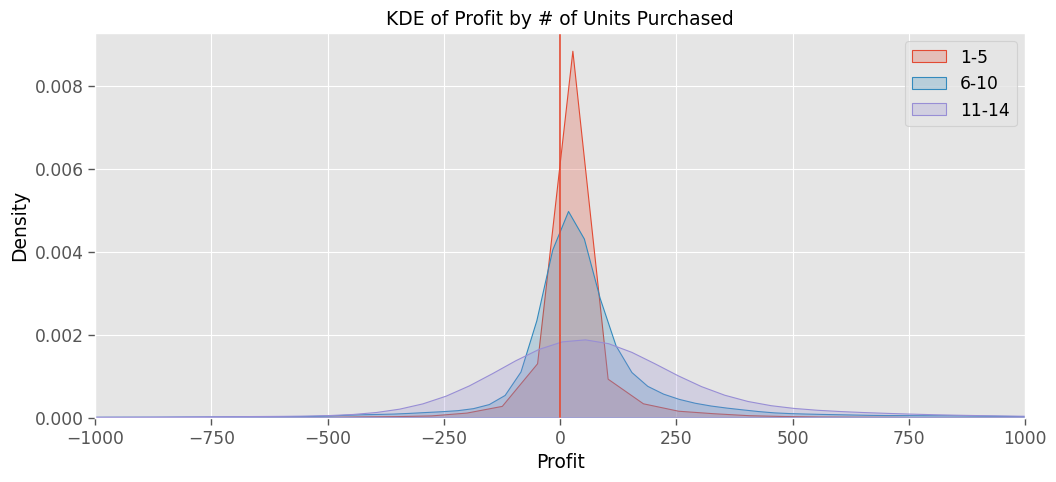

In [131]:
fig,ax = plt.subplots()

sns.kdeplot(one_five['Profit'], label='1-5', fill=True)
sns.kdeplot(six_ten['Profit'], label='6-10', fill=True)
sns.kdeplot(eleven_fourteen['Profit'], label='11-14', fill=True)

plt.axvline(x=0)

ax.set_xlim(-1000,1000)
plt.title('KDE of Profit by # of Units Purchased')
plt.legend()
plt.show()

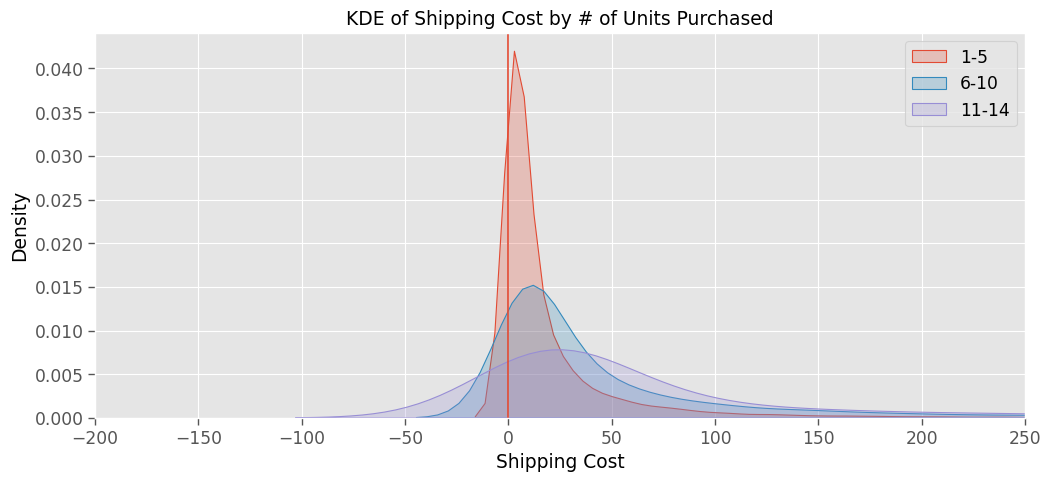

In [132]:
fig,ax = plt.subplots()

sns.kdeplot(one_five['Shipping Cost'], label='1-5', fill=True)
sns.kdeplot(six_ten['Shipping Cost'], label='6-10', fill=True)
sns.kdeplot(eleven_fourteen['Shipping Cost'], label='11-14', fill=True)

plt.axvline(x=0)

ax.set_xlim(-200,250)
plt.title('KDE of Shipping Cost by # of Units Purchased')
plt.legend()
plt.show()

# What is the relationship between: <br> &emsp; discounts and sales <br> &emsp; discounts and profit #

Text(0.5, 1.0, 'Sales Distribution')

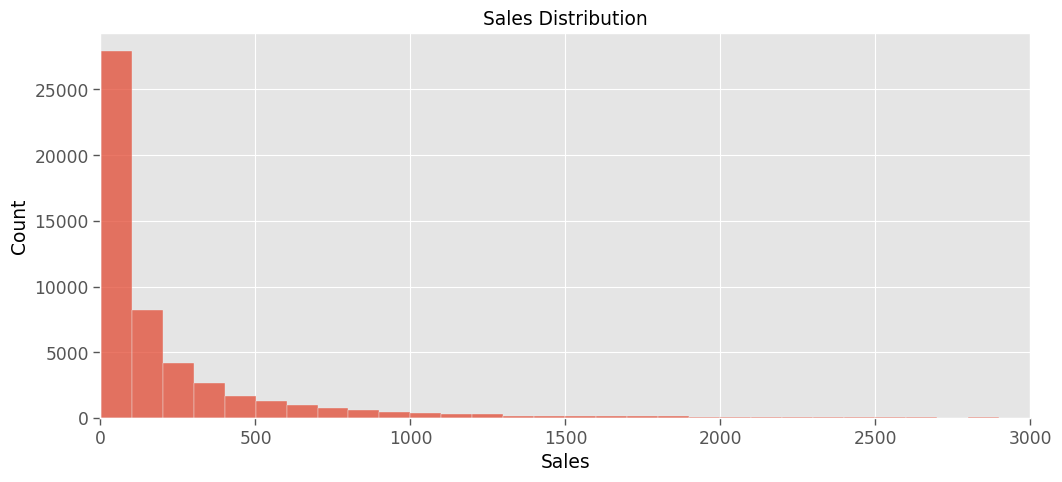

In [133]:
#distribution is heavily skewed to the right
n = target_numeric['Sales'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Sales'])-min(target_numeric['Sales']))/math.sqrt(n)

sales_dist = sns.histplot(data=target_numeric['Sales'], bins=bins, binwidth=bin_width)

sales_dist.set_xlim(0, 3000)
plt.title('Sales Distribution')

<Axes: >

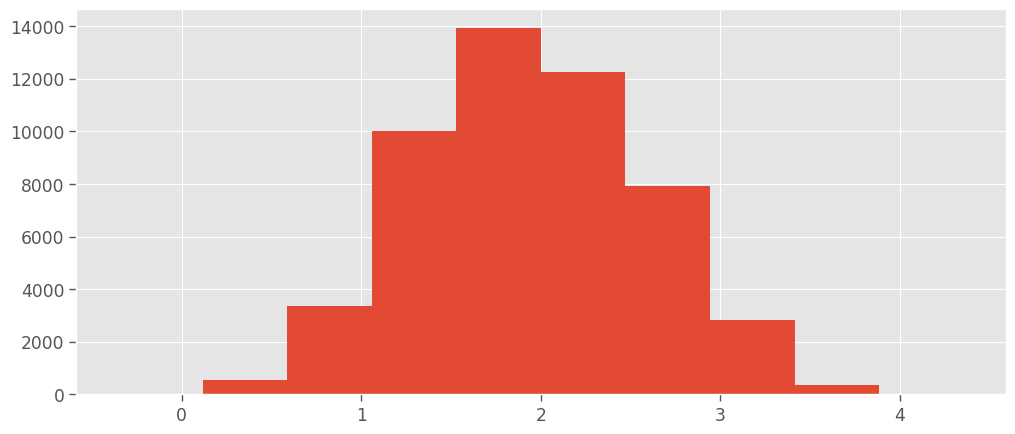

In [134]:
log10_sales = np.log10(df['Sales'])

log10_sales.hist()

<Axes: >

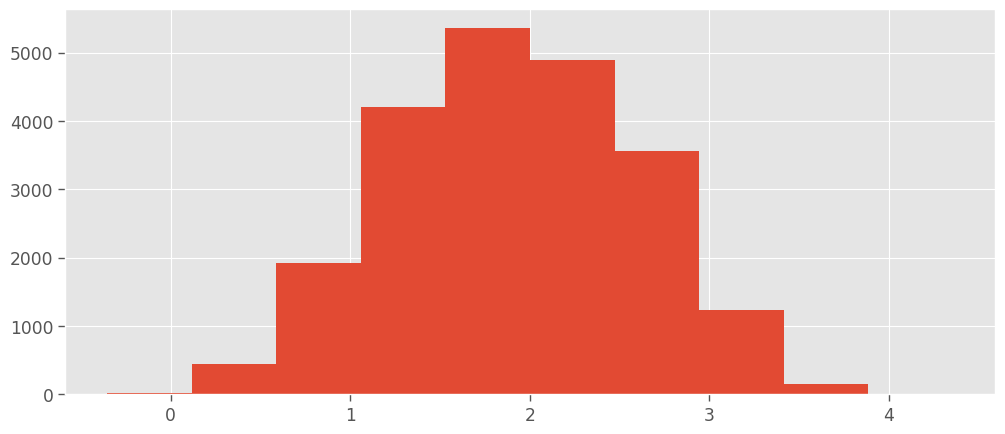

In [135]:
log10_disc_sales = np.log10(discount_df['Sales'])

log10_disc_sales.hist()

<Axes: >

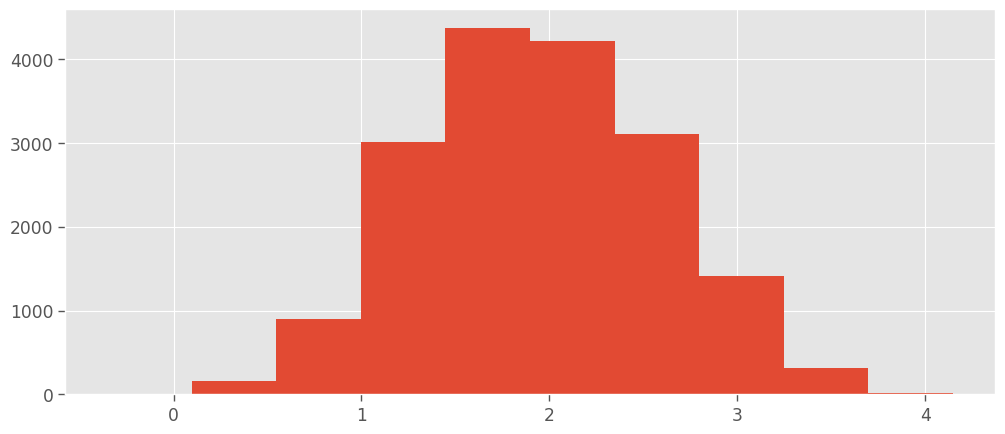

In [136]:
#2014 sales
log10_2014_sales = np.log10(df_2014['Sales'])

log10_2014_sales.hist()

<Axes: >

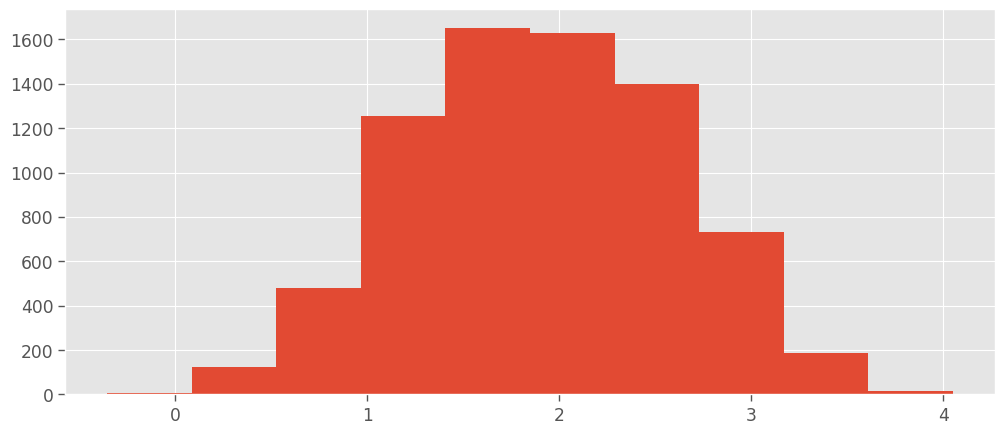

In [137]:
disc_sales_2014 = discount_df.loc[discount_df['Year'] == '2014']

log10_disc_sales_2014 = np.log10(disc_sales_2014['Sales'])
log10_disc_sales_2014.hist()

### Null hypothesis: There is no relationship between discounts and sales ###

In [138]:
#mean of sales vs mean of discounted sales
sales_pop_mean = log10_sales.mean()
sales_2014_mean = log10_2014_sales.mean()
sales_disc_mean = log10_disc_sales.mean()
sales_disc_2014_mean = log10_disc_sales_2014.mean()


In [139]:
sales_std = sts.pstdev(log10_sales)
disc_std = sts.stdev(log10_disc_sales)
sales_std_2014 = sts.pstdev(log10_2014_sales)
disc_std_2014 = sts.stdev(log10_disc_sales_2014)

sales_sem = stats.sem(log10_sales)
disc_sem = stats.sem(log10_disc_sales)
sales_sem_2014 = stats.sem(log10_2014_sales)
disc_sem_2014 = stats.sem(log10_disc_sales_2014)

In [140]:
#total sales t-test
pop_sales = stats.ttest_1samp(a = log10_disc_sales, popmean = sales_pop_mean)
sales_interval= stats.t.interval(confidence=0.95, df=len(log10_disc_sales)-1, loc=sales_disc_mean, scale=disc_sem)

In [141]:
#2014 sales t-test
sales_2014 = stats.ttest_1samp(a = log10_disc_sales_2014, popmean = sales_2014_mean)
sales_2014_interval= stats.t.interval(confidence=0.95, df=len(log10_disc_sales_2014)-1, \
                                      loc=sales_disc_2014_mean, scale=disc_sem_2014)

In [142]:
sales_group = pd.DataFrame()
group = ['Sales', 'Discounted Sales', '2014 Sales', '2014 Discounted Sales']
n = [len(log10_sales), len(log10_disc_sales), len(log10_2014_sales), len(log10_disc_sales_2014)]
means = [sales_pop_mean, sales_disc_mean, sales_2014_mean, sales_disc_2014_mean]
std = [sales_std, disc_std, sales_std_2014, disc_std_2014]
sem = [sales_sem, disc_sem, sales_sem_2014, disc_sem_2014]

In [143]:
sales_group['Group'] = group
sales_group['N'] = n
sales_group['Mean'] = means
sales_group['Std. Dev'] = std
sales_group['Std. Error Mean'] = sem

In [144]:
sales_group

,Group,N,Mean,Std. Dev,Std. Error Mean
0,Sales,51290,1.947202,0.633130,0.002796
1,Discounted Sales,21820,1.913149,0.678615,0.004594
2,2014 Sales,17531,1.945043,0.633909,0.004788
3,2014 Discounted Sales,7477,1.909442,0.675845,0.007816


In [145]:
sales_ttest = pd.DataFrame()
group = ['Sales','2014 Sales']
t = [pop_sales[0], sales_2014[0]]
p = [pop_sales[1], sales_2014[1]]
deg_freedom = [len(log10_disc_sales)-1, len(log10_disc_sales_2014)-1]
mean_diff = [sales_pop_mean-sales_disc_mean, sales_2014_mean-sales_disc_2014_mean]
lower = [sales_interval[0], sales_2014_interval[0]]
upper = [sales_interval[1], sales_2014_interval[1]]

In [146]:
sales_ttest['Group'] = group
sales_ttest['t'] = t
sales_ttest['p'] = p
sales_ttest['df'] = deg_freedom
sales_ttest['Mean Difference'] = mean_diff
sales_ttest['Lower'] = lower
sales_ttest['Upper'] = upper

In [147]:
sales_ttest

,Group,t,p,df,Mean Difference,Lower,Upper
0,Sales,-7.412323,1.286267e-13,21819,0.034053,1.904145,1.922154
1,2014 Sales,-4.554913,5.323800e-06,7476,0.035601,1.894120,1.924763


### The t statistic lies outside of the lower and upper quantiles. The p-value is also less than the alpha value corresponding to the specified 95% confidence interval. The null hypothesis is rejected. There is a statistically significant relationship between discount and sales. ###

# What is the relationship between discounts and profit? #

### Null hypothesis: The profit mean is not statistically different from the profit mean of discounted sales ###

Text(0.5, 1.0, 'Profit Distribution')

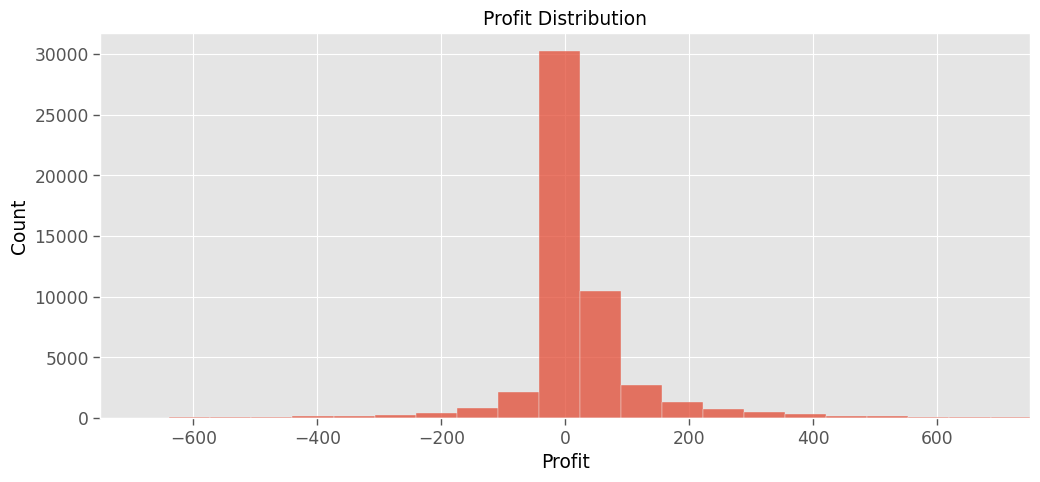

In [148]:
#distribution approximately normally distributed but seems to contain many outliers
n = target_numeric['Profit'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Profit'])-min(target_numeric['Profit']))/math.sqrt(n)

prof_dist = sns.histplot(data=target_numeric['Profit'], bins=bins, binwidth=bin_width)
prof_dist.set_xlim(-750,750)
plt.title('Profit Distribution')

In [149]:
#profit distribution is already approximately normally distributed
profit_pop_mean = df['Profit'].mean()
profit_disc_mean = discount_df['Profit'].mean()

profit_2014_mean = df_2014['Profit'].mean()
profit_disc_2014_mean = disc_sales_2014['Profit'].mean()

In [150]:
profit_std = sts.pstdev(df['Profit'])
profit_disc_std = sts.stdev(discount_df['Profit'])
profit_std_2014 = sts.pstdev(df_2014['Profit'])
profit_disc_std_2014 = sts.stdev(disc_sales_2014['Profit'])

profit_sem = stats.sem(df['Profit'])
disc_sem = stats.sem(discount_df['Profit'])
profit_sem_2014 = stats.sem(df_2014['Profit'])
disc_sem_2014 = stats.sem(disc_sales_2014['Profit'])

In [151]:
pop_profit = stats.ttest_1samp(a = discount_df['Profit'], popmean = profit_pop_mean)
profit_interval= stats.t.interval(confidence=0.95, df=len(discount_df['Profit'])-1, loc=profit_disc_mean, scale=disc_sem)

In [152]:
profit_2014 = stats.ttest_1samp(a = disc_sales_2014['Profit'], popmean = profit_2014_mean)
profit_2014_interval = stats.t.interval(confidence=0.95, df=len(disc_sales_2014['Profit'])-1, \
                                        loc=profit_disc_2014_mean, scale=disc_sem_2014)

In [153]:
profit_group = pd.DataFrame()
group = ['Profit', 'Discounted Profit', '2014 Profit', '2014 Discounted Profit']
n = [len(df), len(discount_df), len(df_2014), len(disc_sales_2014)]
means = [profit_pop_mean, profit_disc_mean, profit_2014_mean, profit_disc_2014_mean]
std = [sales_std, disc_std, sales_std_2014, disc_std_2014]
sem = [sales_sem, disc_sem, sales_sem_2014, disc_sem_2014]

In [154]:
profit_group['Group'] = group
profit_group['N'] = n
profit_group['Mean'] = means
profit_group['Std. Dev'] = std
profit_group['Std. Error Mean'] = sem

In [155]:
profit_ttest = pd.DataFrame()
group = ['Profit','2014 Profit']
t = [pop_profit[0], profit_2014[0]]
p = [pop_profit[1], profit_2014[1]]
deg_freedom = [len(discount_df)-1, len(disc_sales_2014)-1]
mean_diff = [profit_pop_mean-profit_disc_mean, profit_2014_mean-profit_disc_2014_mean]
lower = [profit_interval[0], profit_2014_interval[0]]
upper = [profit_interval[1], profit_2014_interval[1]]

In [156]:
profit_ttest['Group'] = group
profit_ttest['t'] = t
profit_ttest['p'] = p
profit_ttest['df'] = deg_freedom
profit_ttest['Mean Difference'] = mean_diff
profit_ttest['Lower'] = lower
profit_ttest['Upper'] = upper

In [157]:
profit_group

,Group,N,Mean,Std. Dev,Std. Error Mean
0,Profit,51290,28.610982,0.633130,0.002796
1,Discounted Profit,21820,-16.554288,0.678615,1.213389
2,2014 Profit,17531,28.758540,0.633909,0.004788
3,2014 Discounted Profit,7477,-15.867617,0.675845,2.089064


In [158]:
profit_ttest

,Group,t,p,df,Mean Difference,Lower,Upper
0,Profit,-37.222419,4.478035e-294,21819,45.165270,-18.932618,-14.175957
1,2014 Profit,-21.361794,2.515943e-98,7476,44.626158,-19.962771,-11.772464
